In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # 每100个batch打印一次损失值
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('Finished Training')

[1,   100] loss: 0.685
[1,   200] loss: 0.166
[1,   300] loss: 0.109
[1,   400] loss: 0.096
[1,   500] loss: 0.088
[1,   600] loss: 0.097
[1,   700] loss: 0.080
[1,   800] loss: 0.059
[1,   900] loss: 0.054
[2,   100] loss: 0.051
[2,   200] loss: 0.049
[2,   300] loss: 0.045
[2,   400] loss: 0.048
[2,   500] loss: 0.034
[2,   600] loss: 0.037
[2,   700] loss: 0.046
[2,   800] loss: 0.040
[2,   900] loss: 0.042
[3,   100] loss: 0.029
[3,   200] loss: 0.033
[3,   300] loss: 0.033
[3,   400] loss: 0.034
[3,   500] loss: 0.026
[3,   600] loss: 0.028
[3,   700] loss: 0.031
[3,   800] loss: 0.030
[3,   900] loss: 0.039
[4,   100] loss: 0.016
[4,   200] loss: 0.022
[4,   300] loss: 0.028
[4,   400] loss: 0.018
[4,   500] loss: 0.023
[4,   600] loss: 0.020
[4,   700] loss: 0.023
[4,   800] loss: 0.026
[4,   900] loss: 0.026
[5,   100] loss: 0.019
[5,   200] loss: 0.015
[5,   300] loss: 0.012
[5,   400] loss: 0.015
[5,   500] loss: 0.017
[5,   600] loss: 0.021
[5,   700] loss: 0.018
[5,   800] 

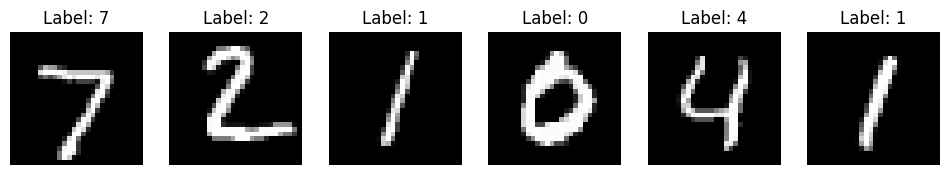

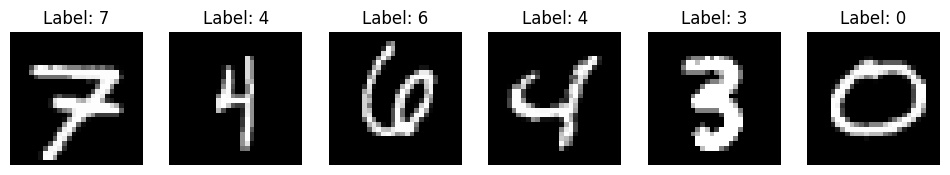

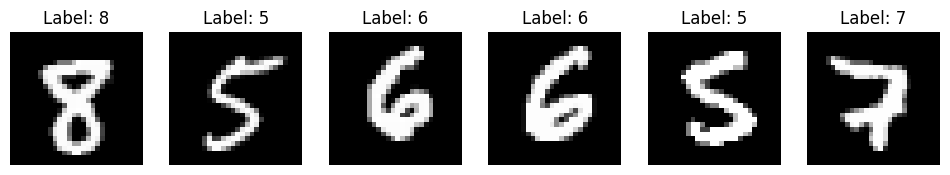

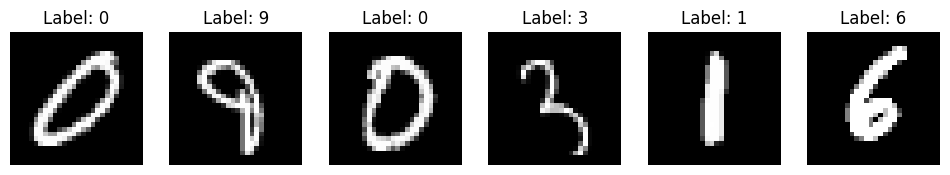

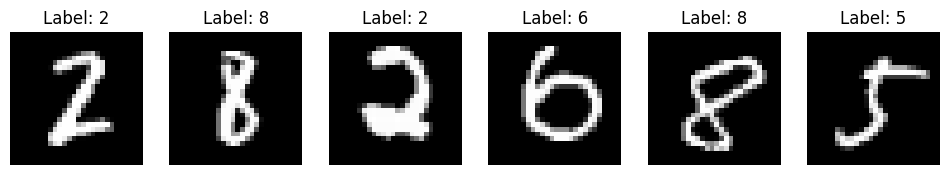

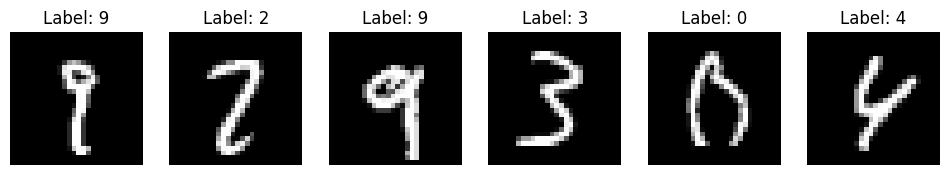

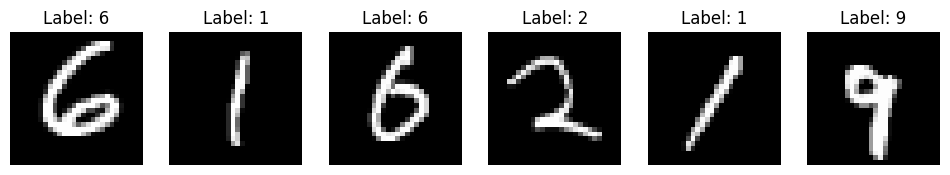

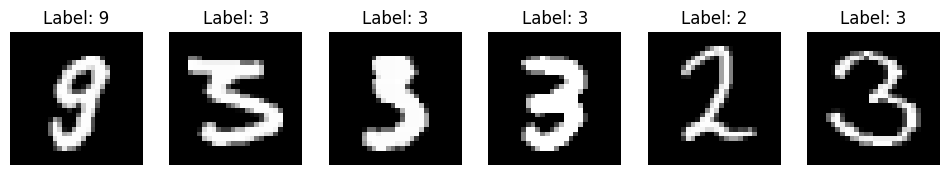

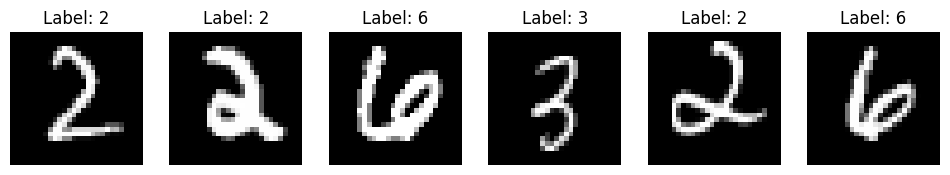

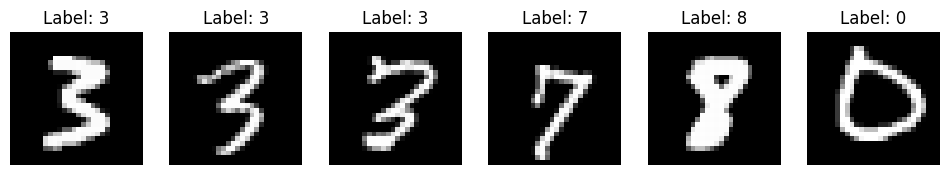

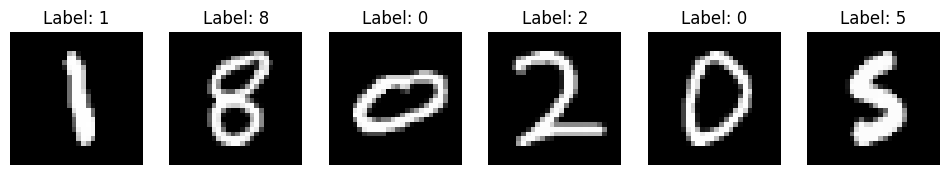

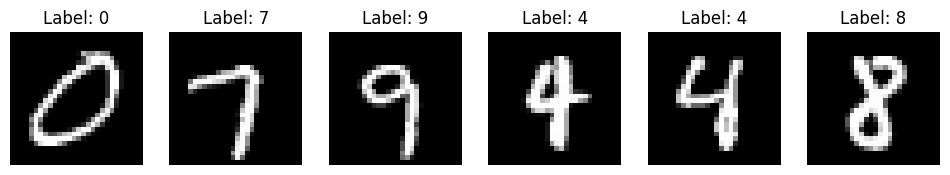

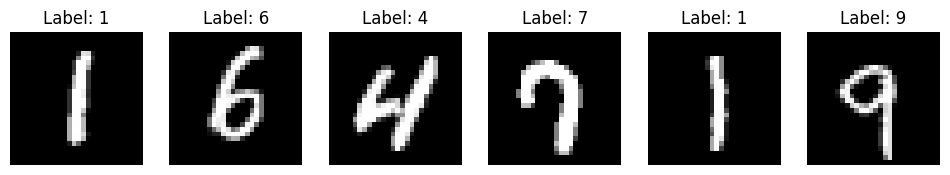

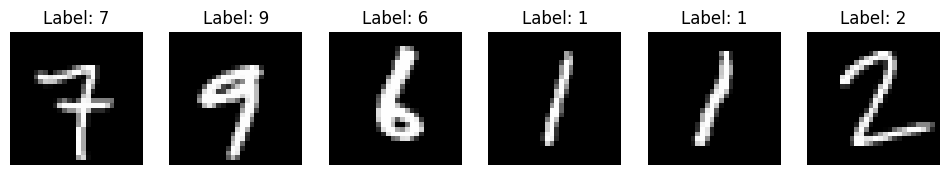

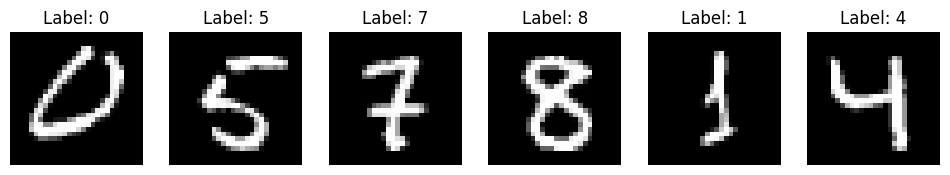

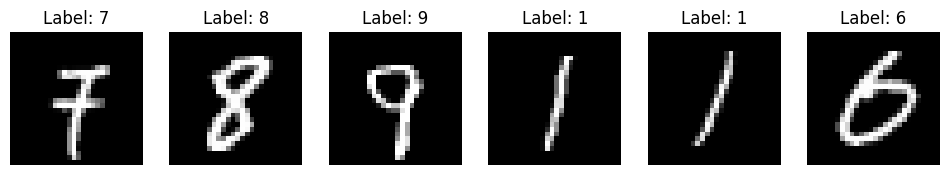

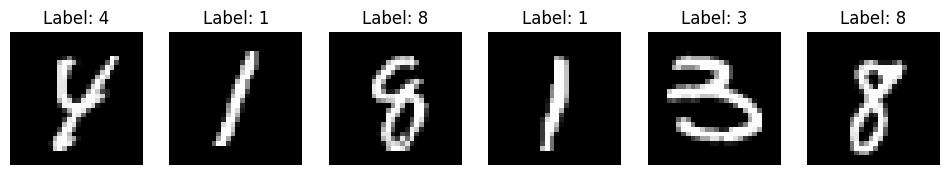

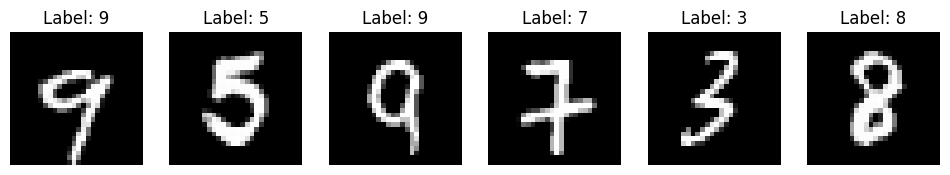

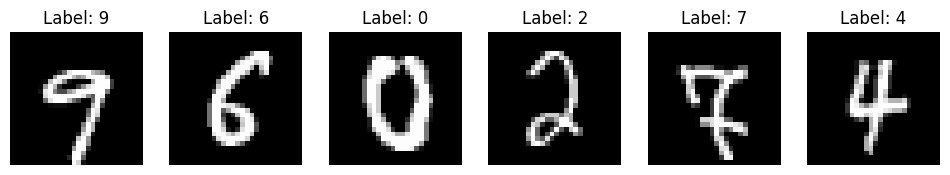

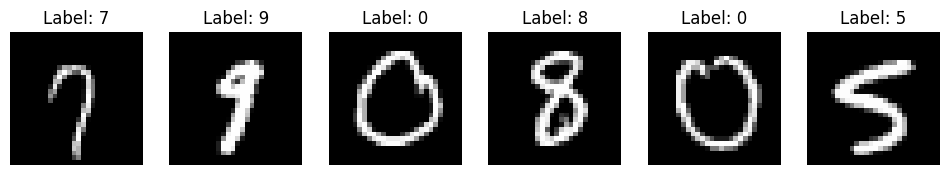

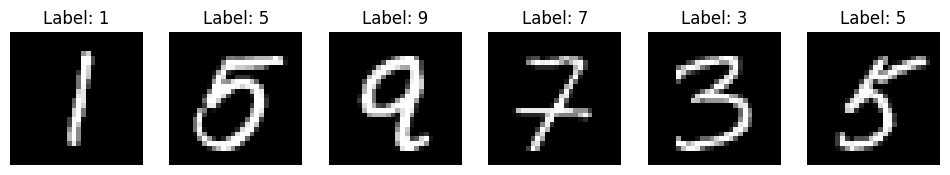

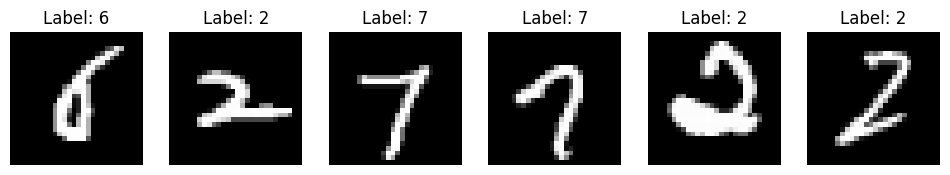

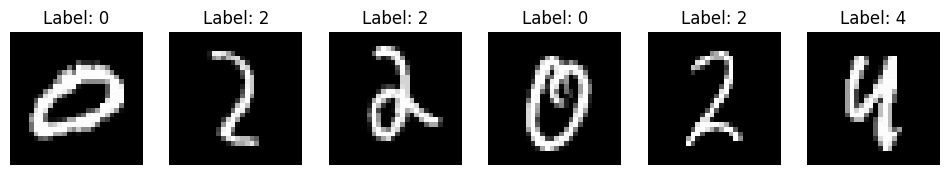

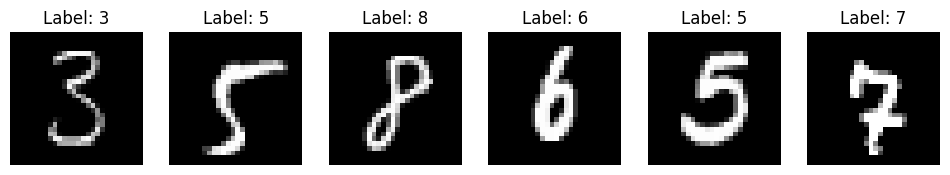

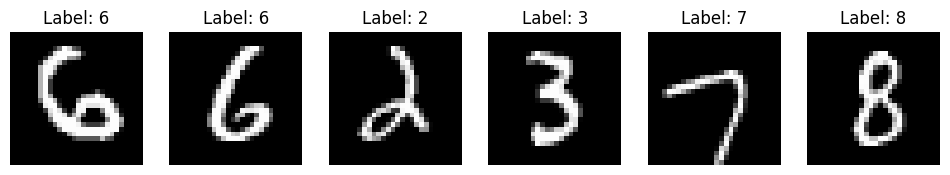

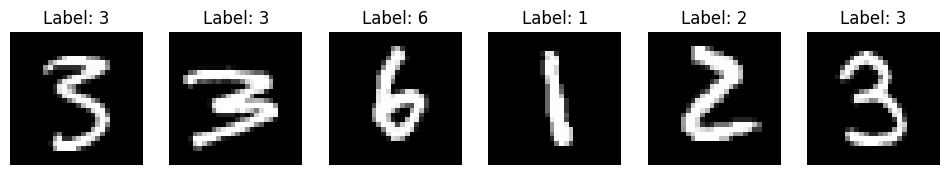

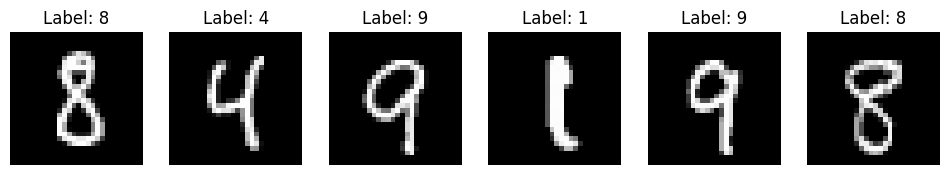

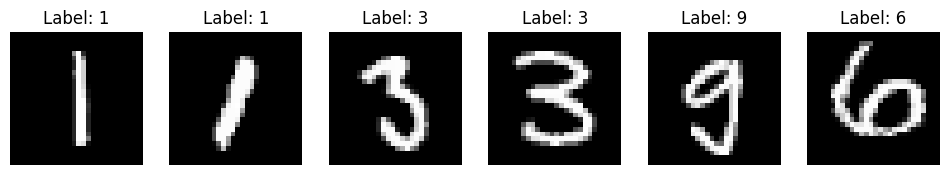

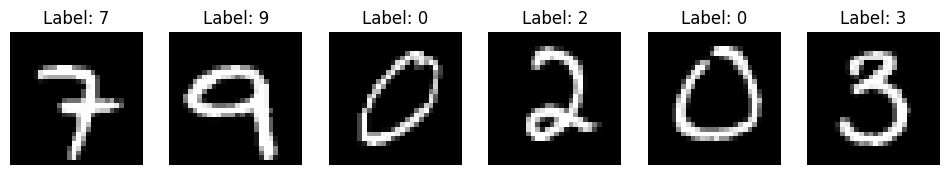

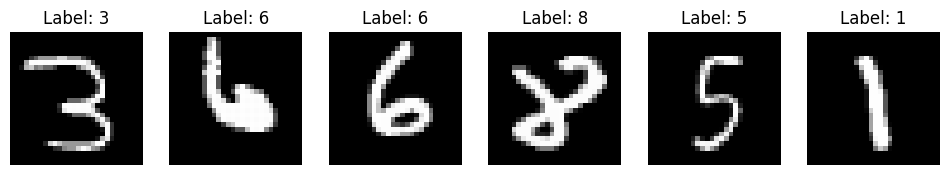

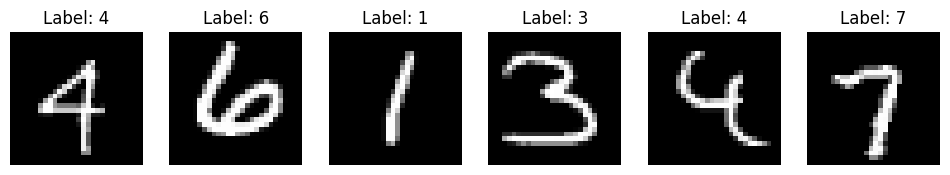

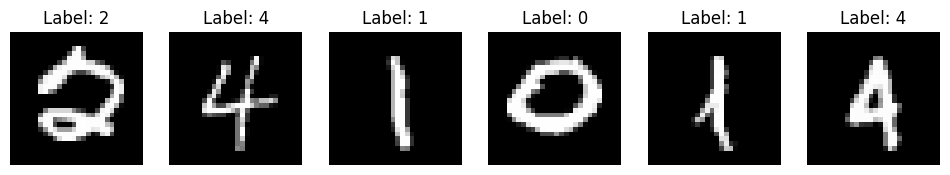

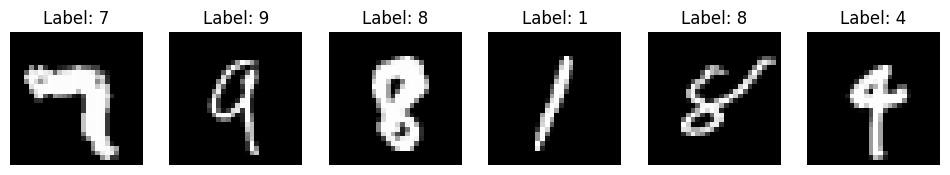

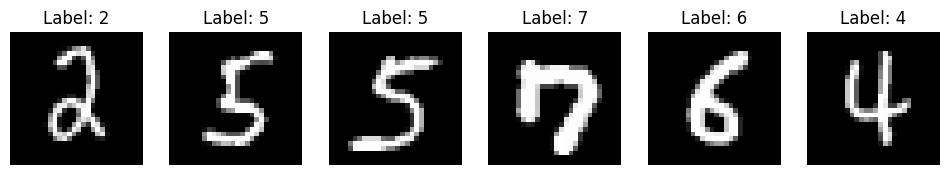

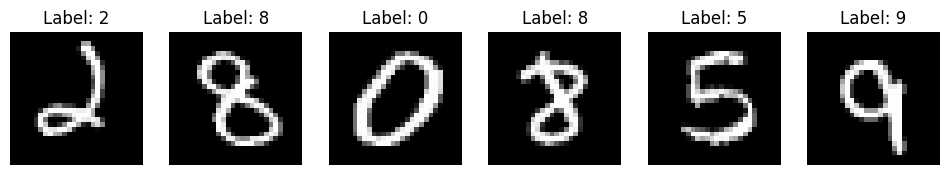

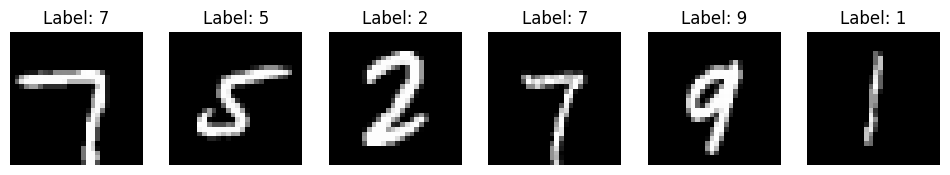

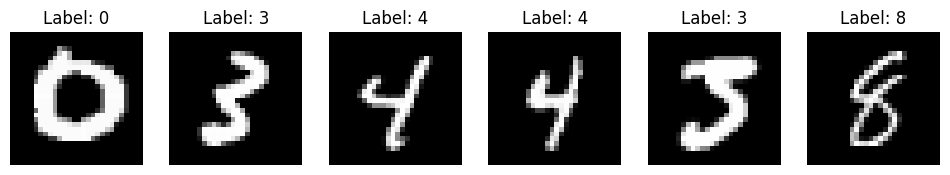

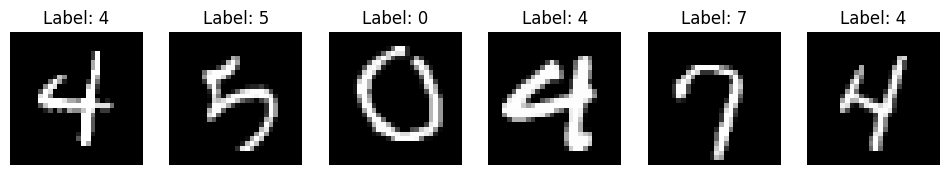

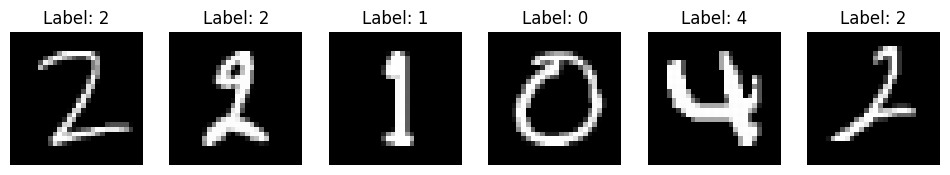

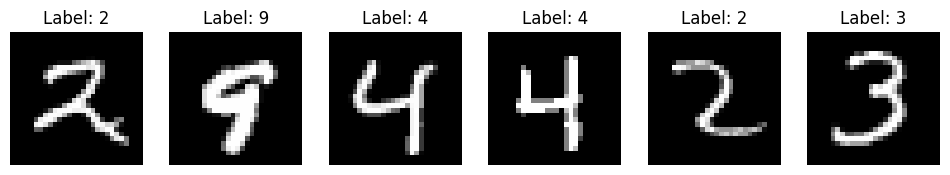

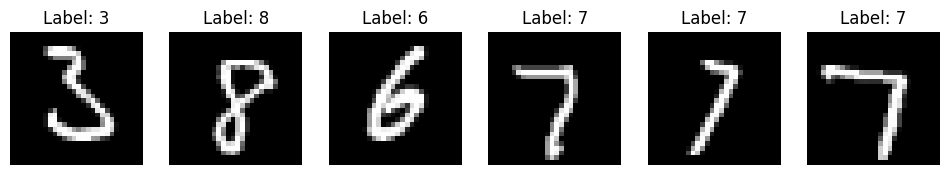

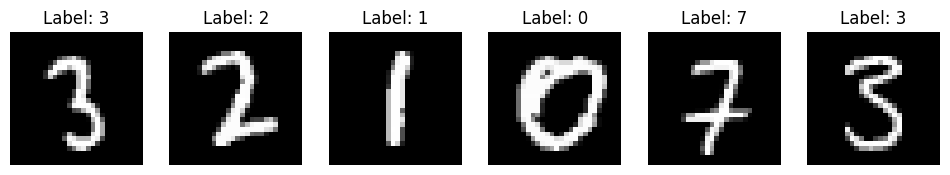

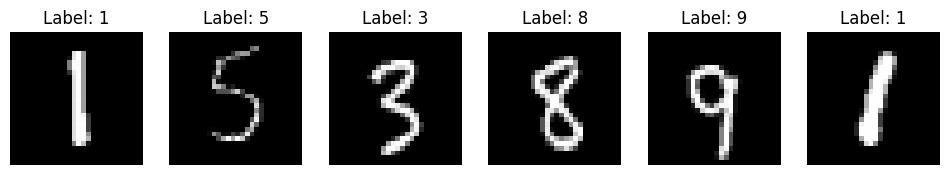

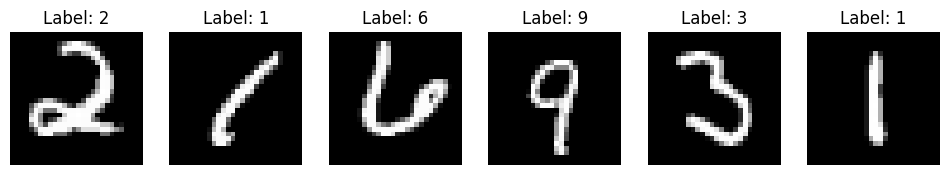

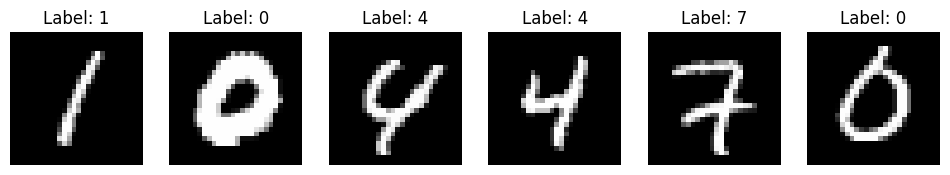

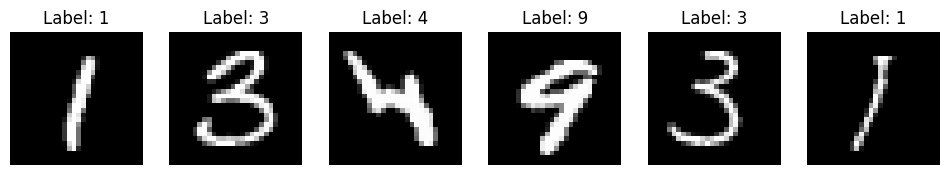

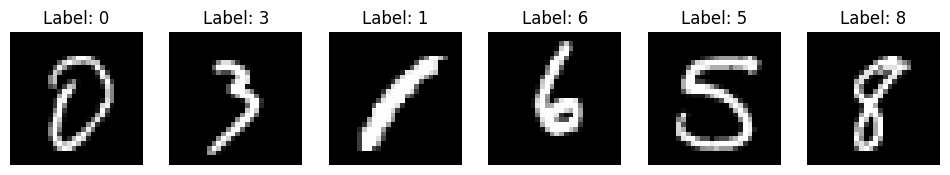

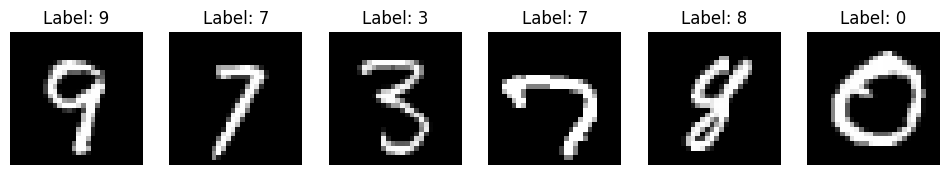

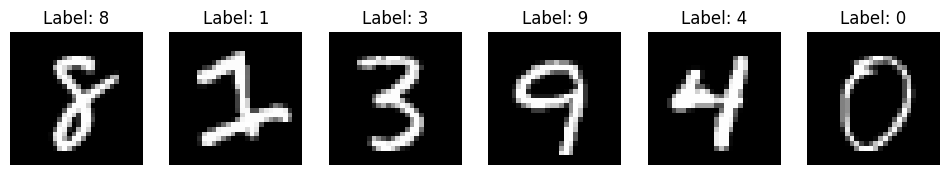

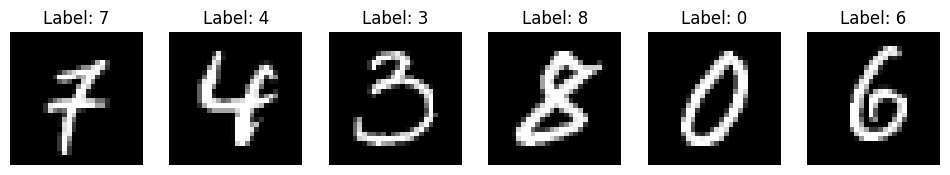

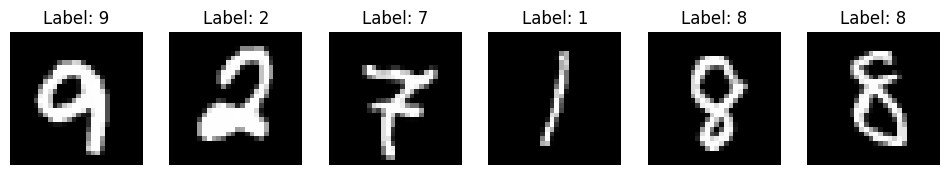

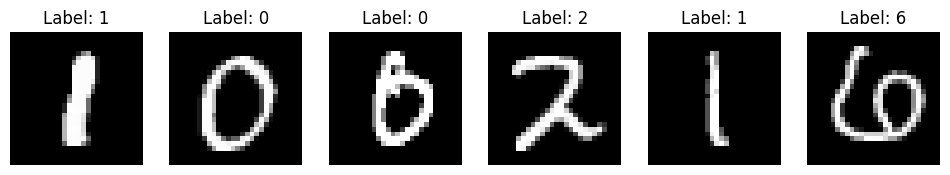

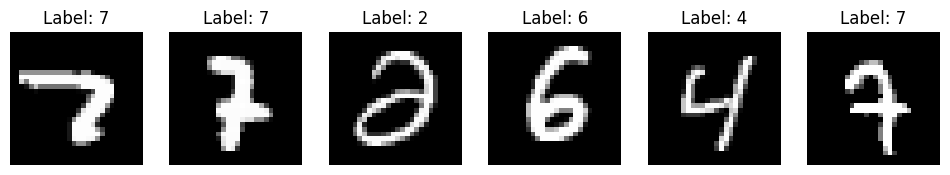

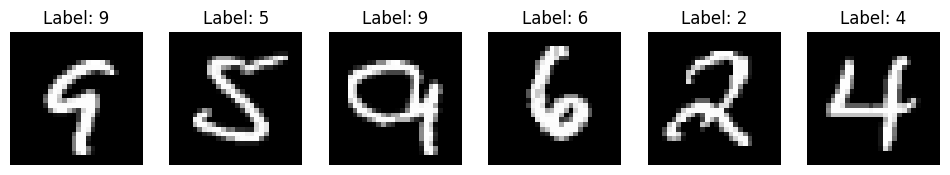

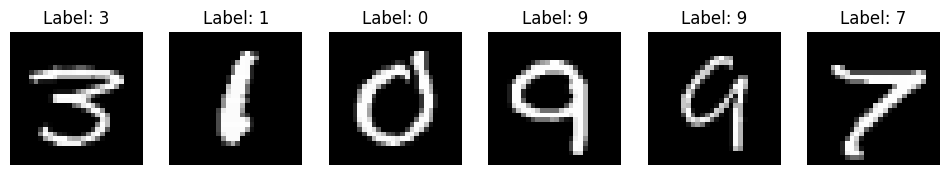

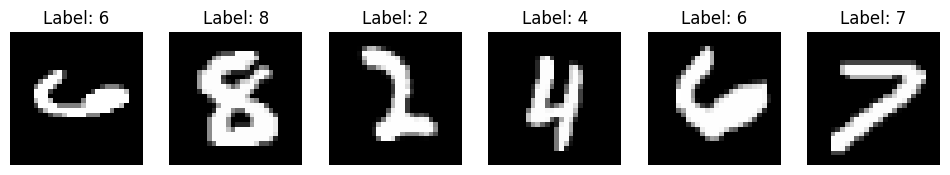

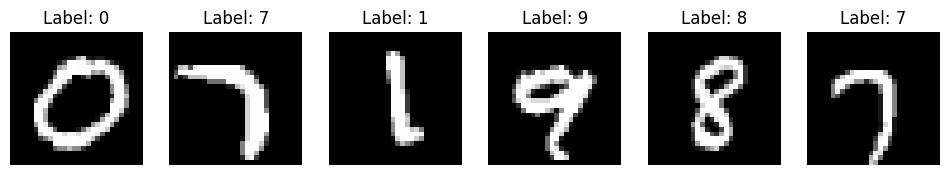

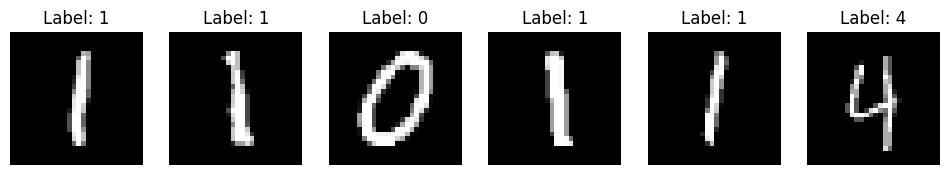

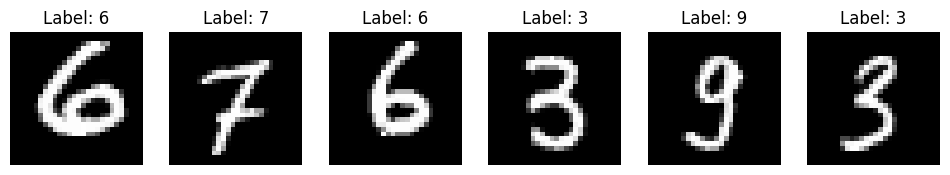

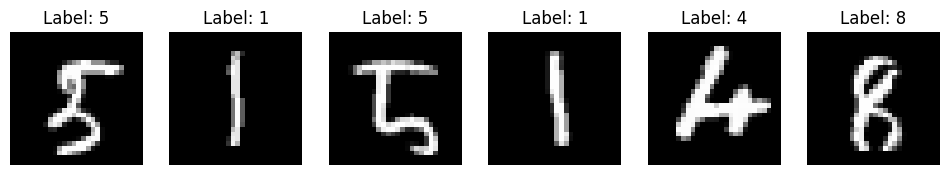

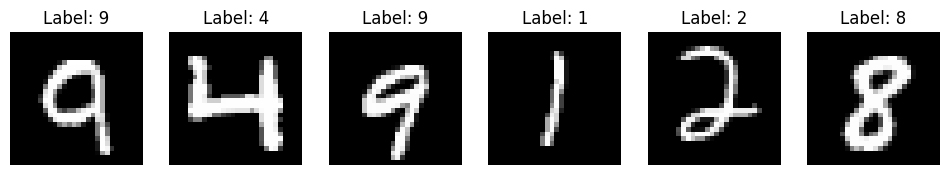

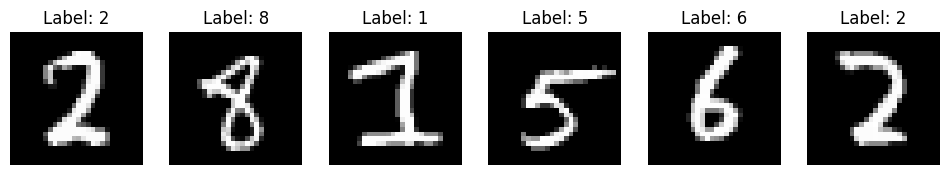

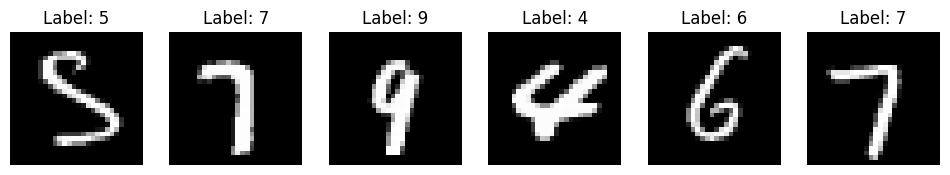

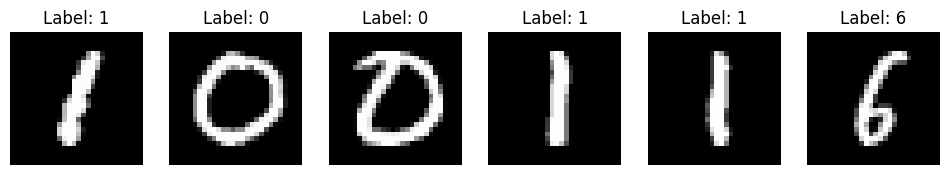

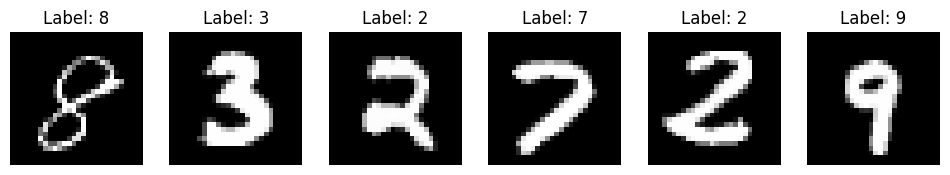

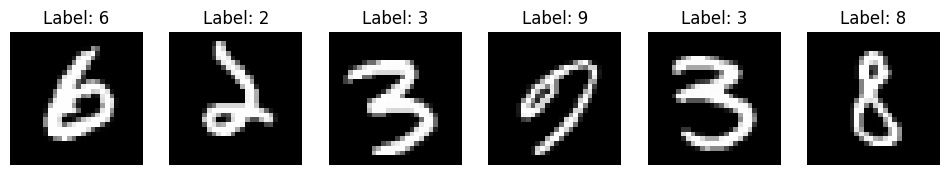

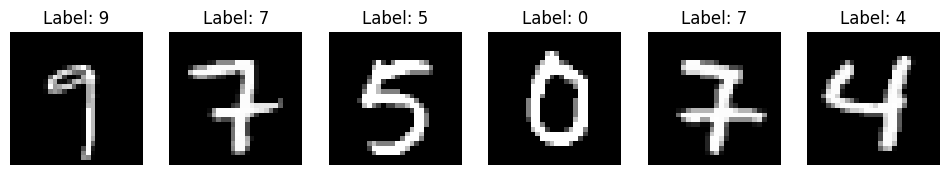

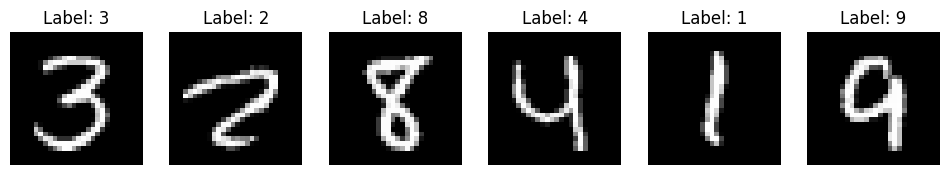

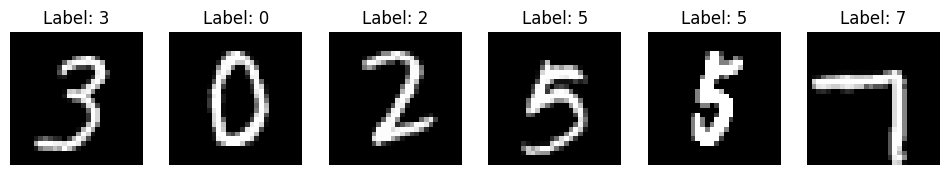

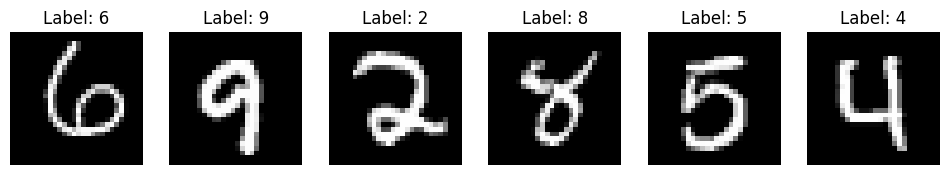

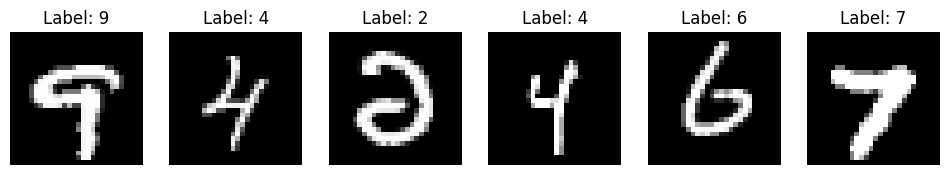

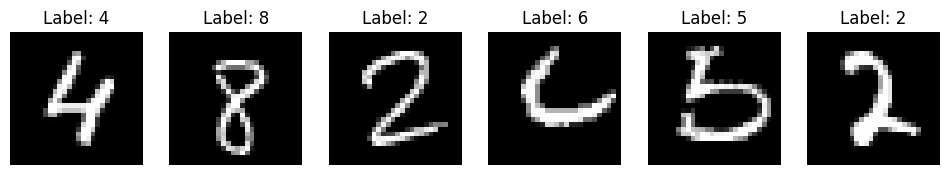

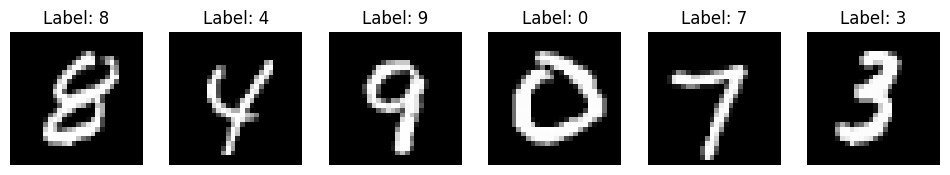

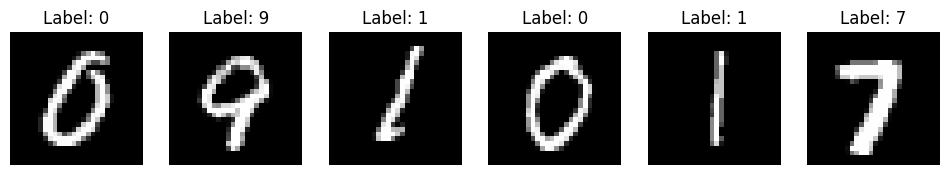

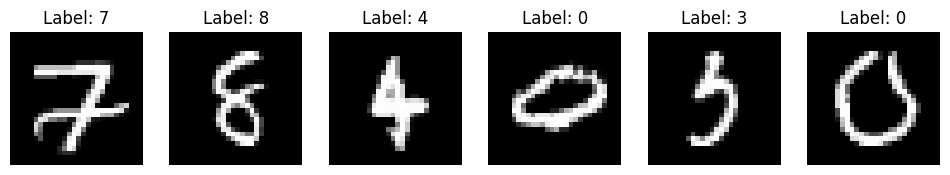

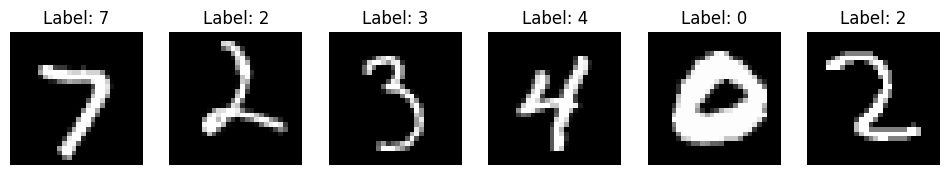

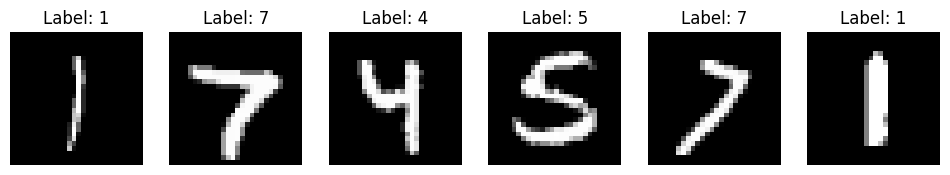

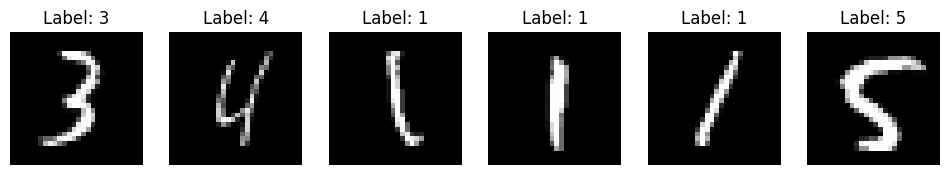

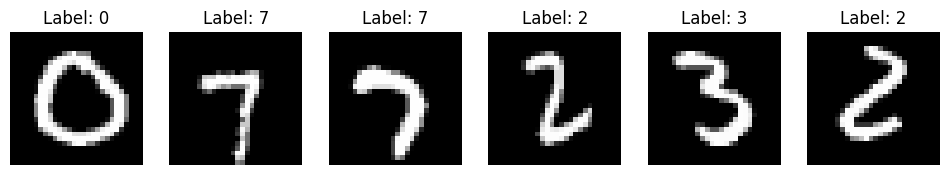

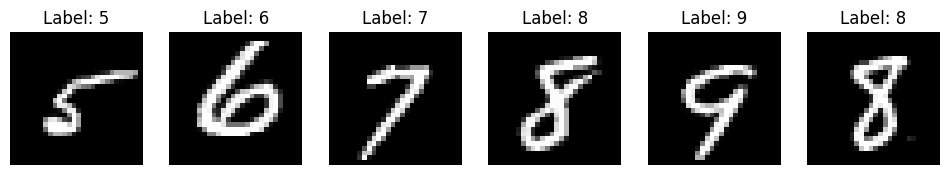

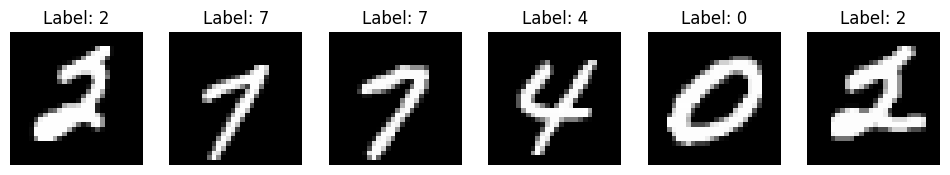

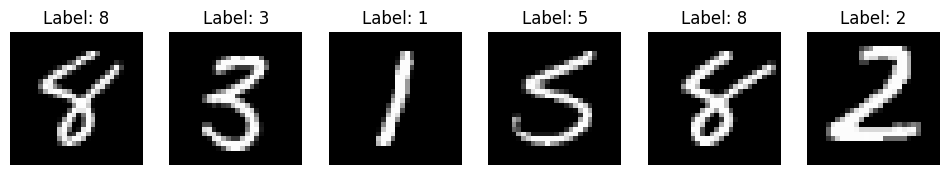

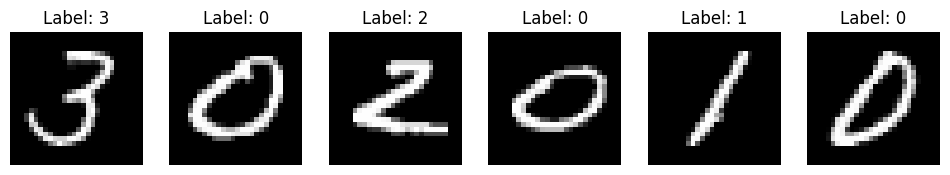

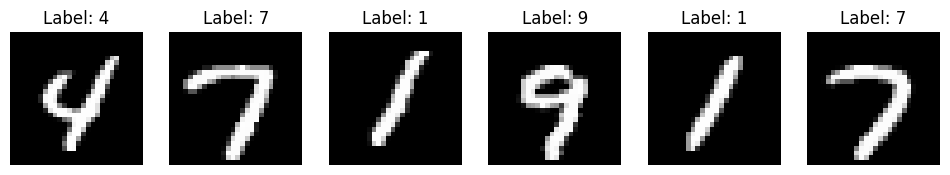

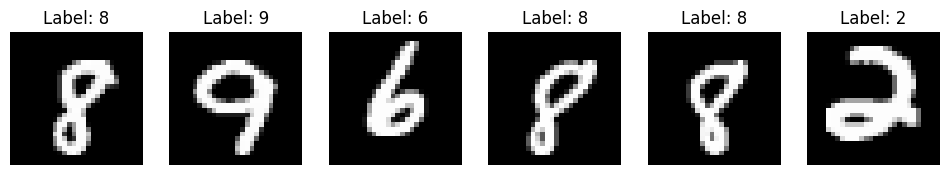

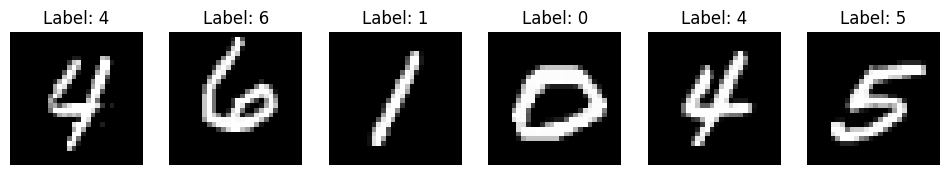

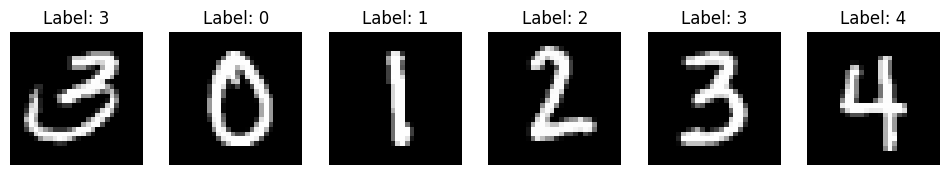

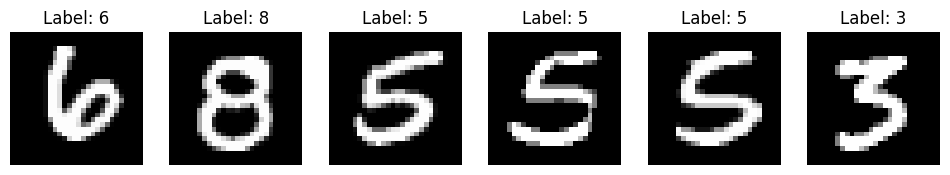

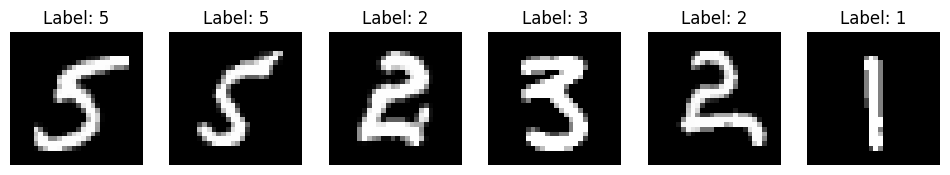

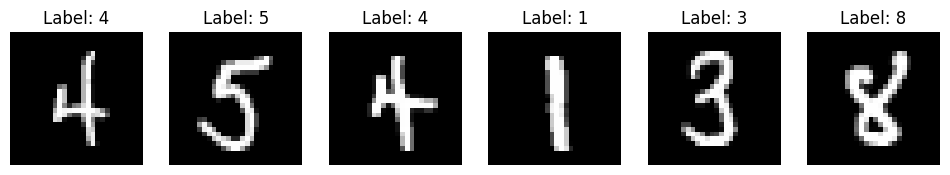

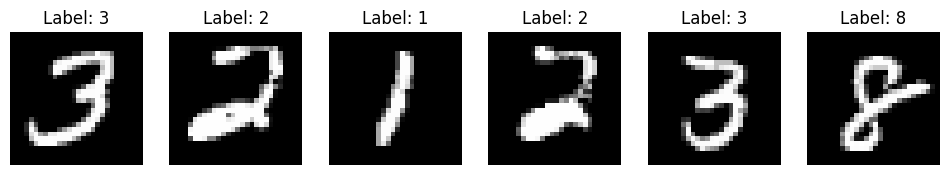

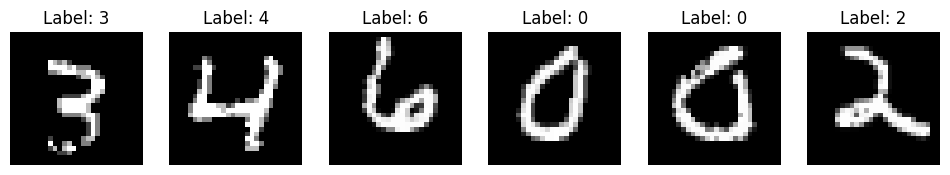

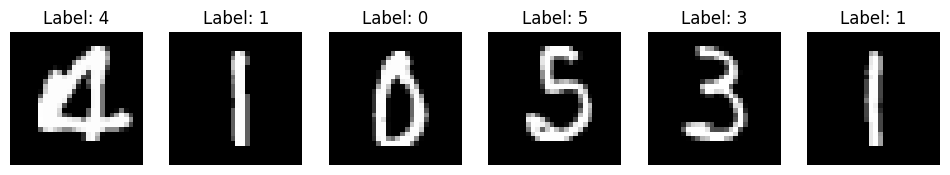

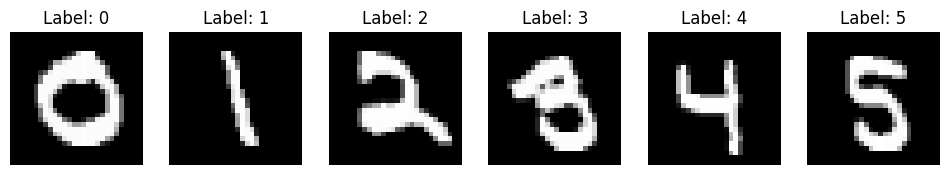

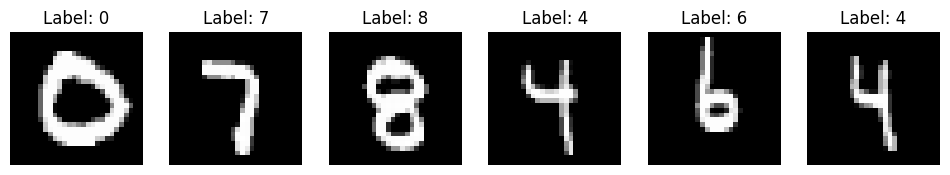

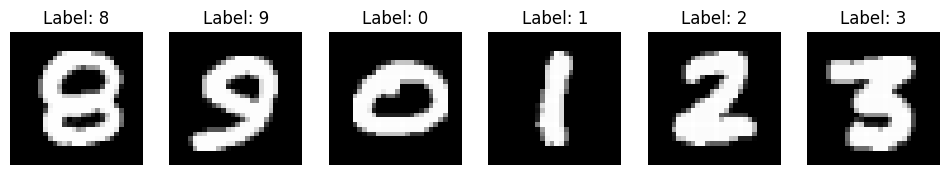

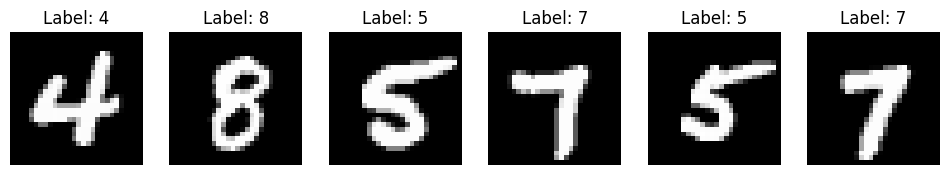

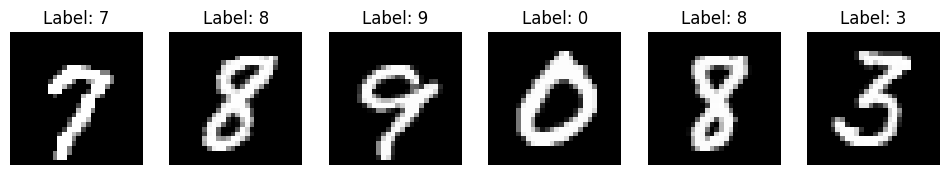

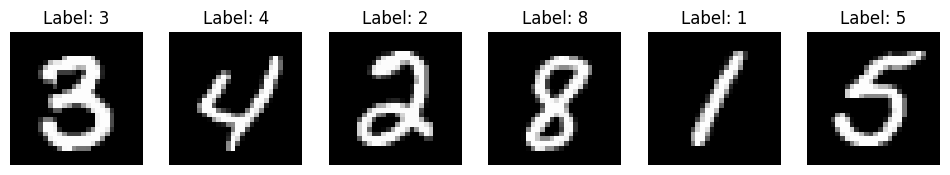

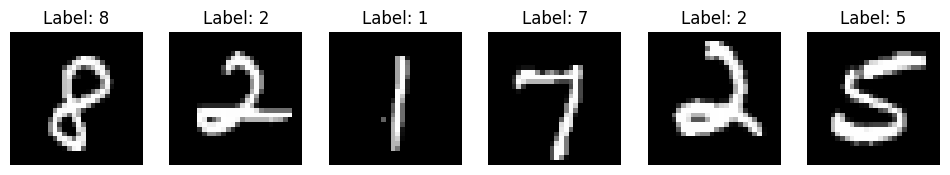

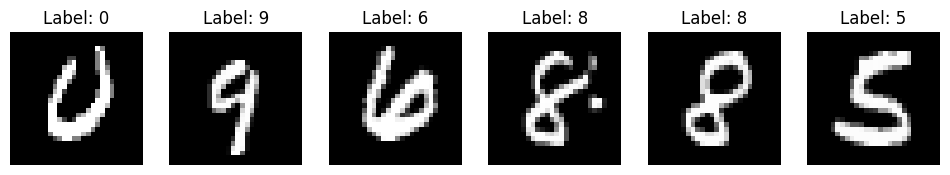

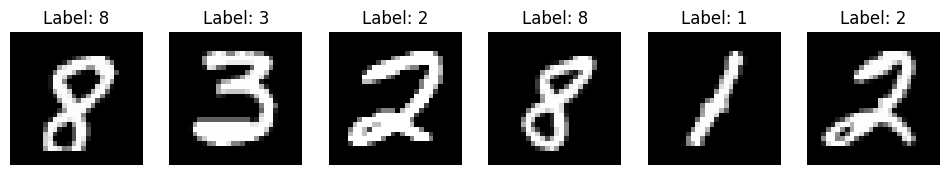

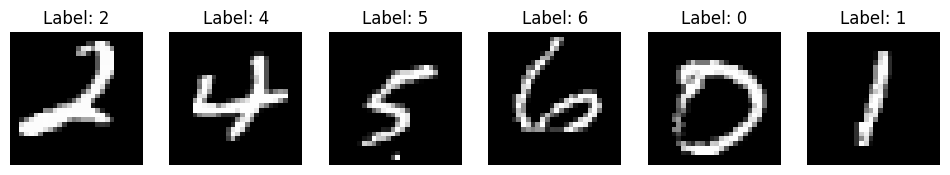

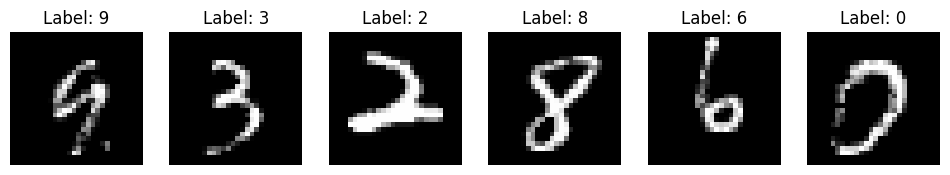

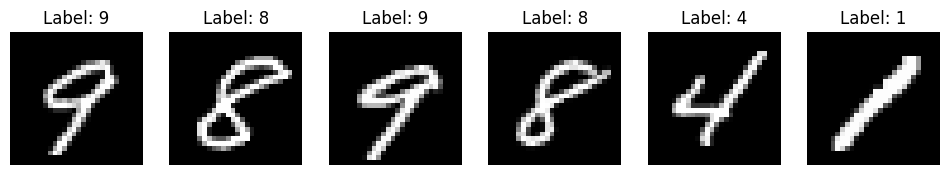

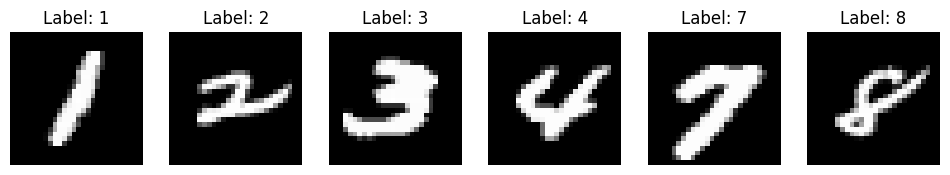

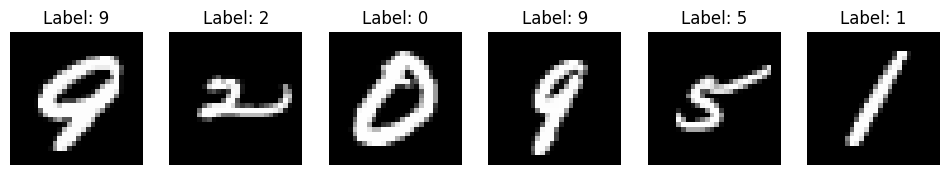

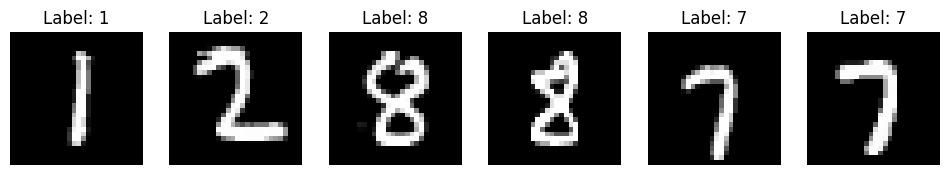

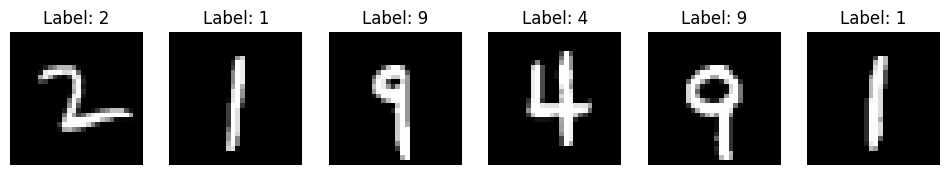

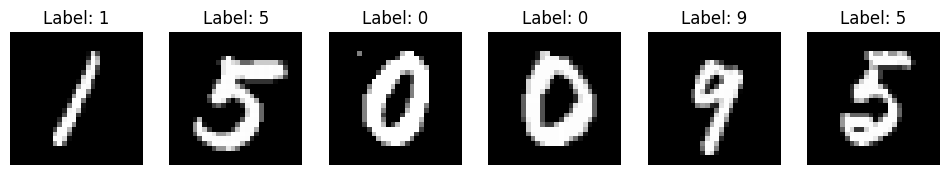

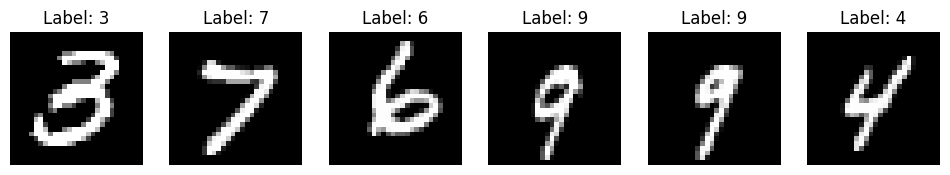

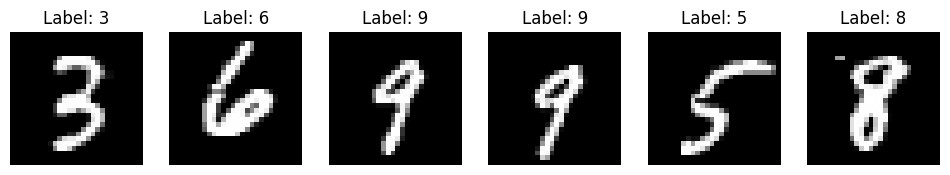

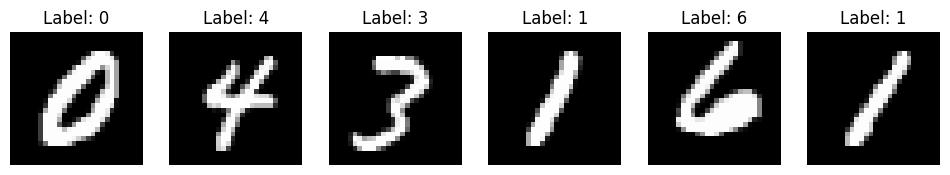

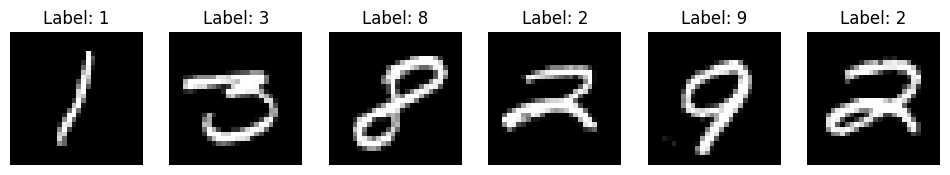

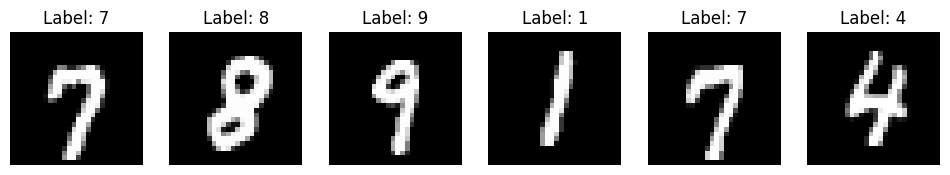

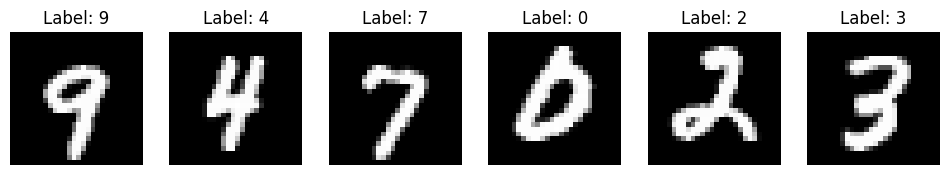

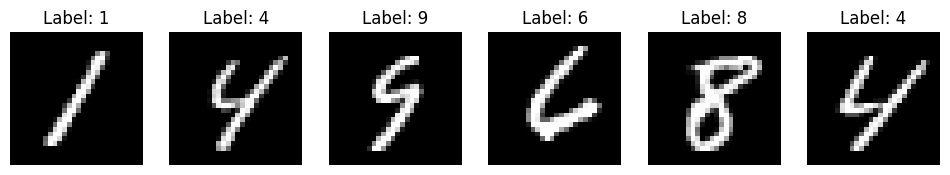

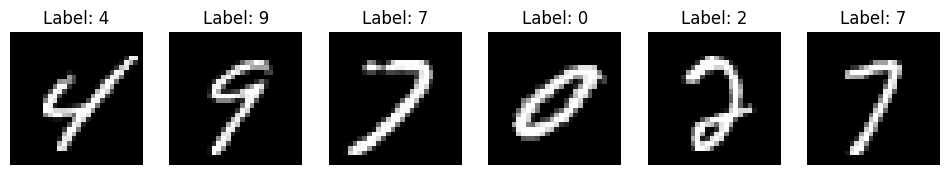

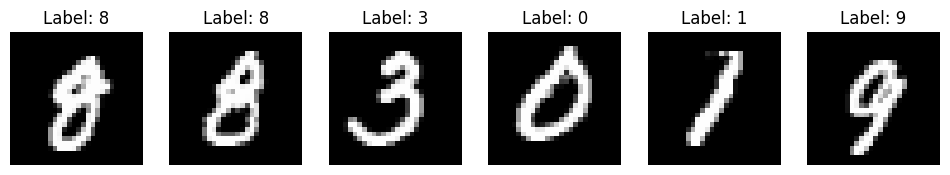

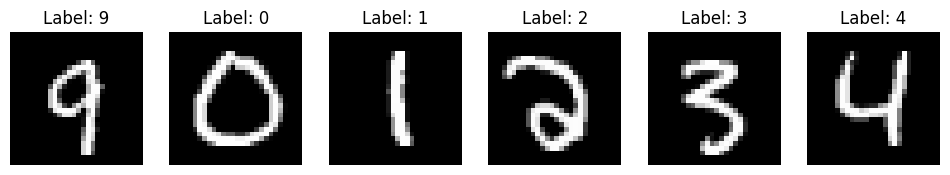

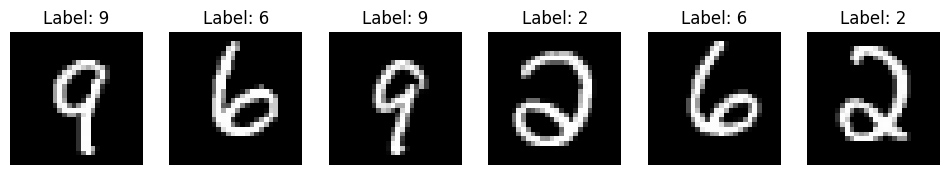

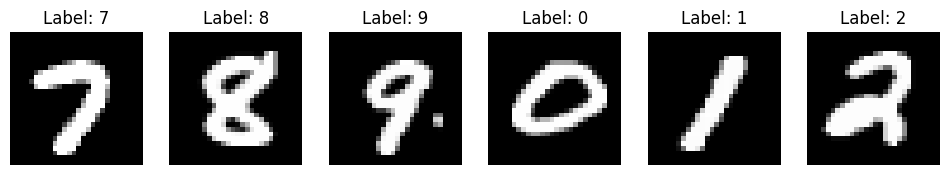

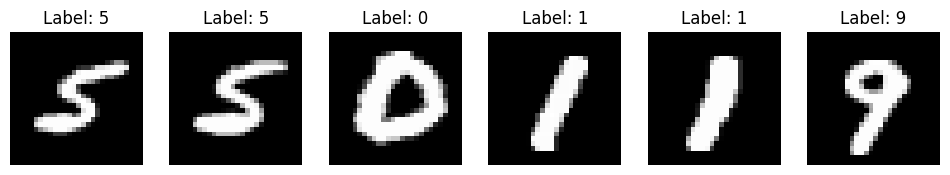

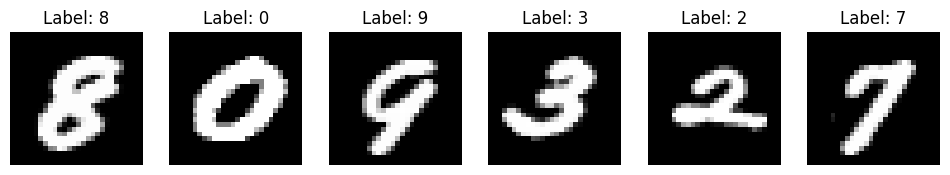

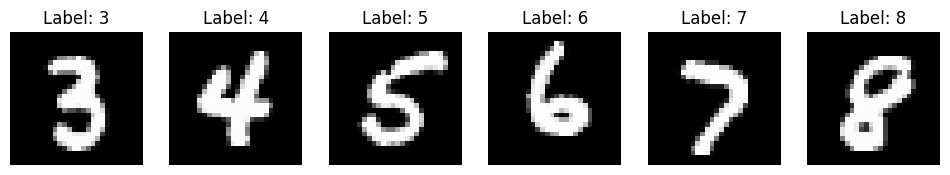

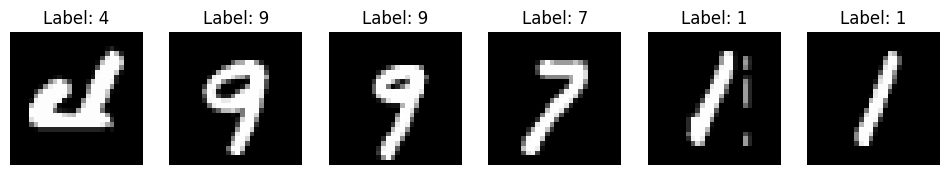

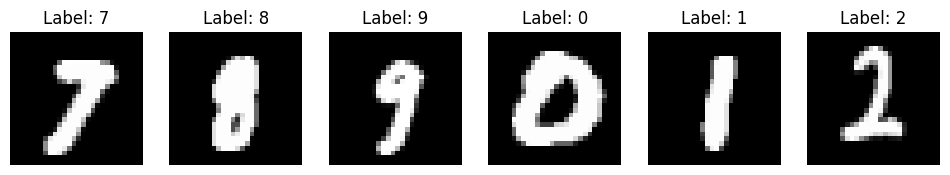

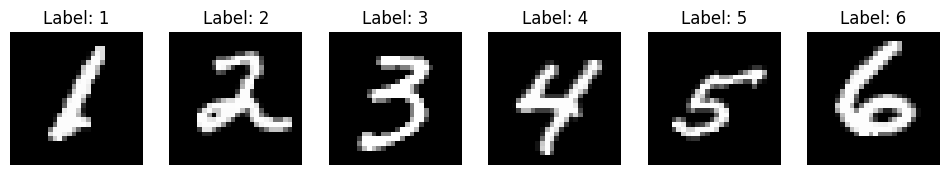

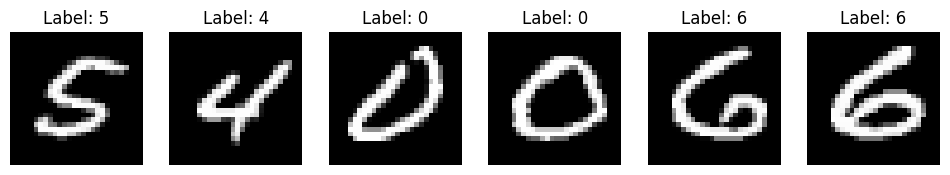

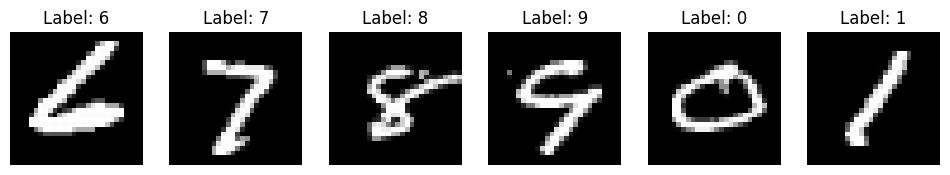

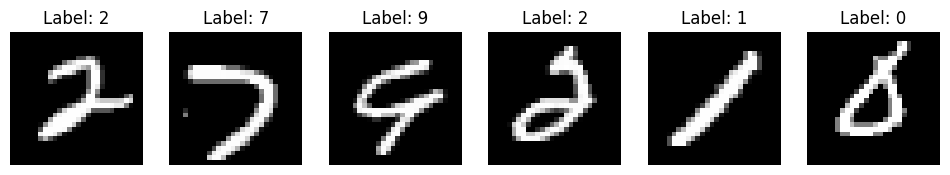

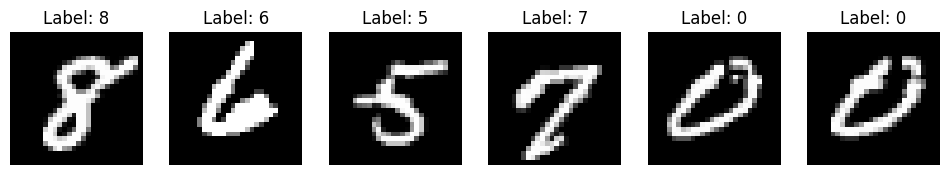

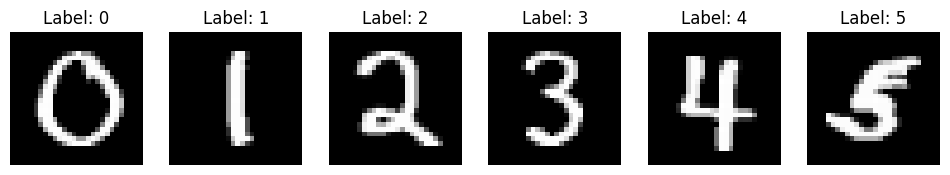

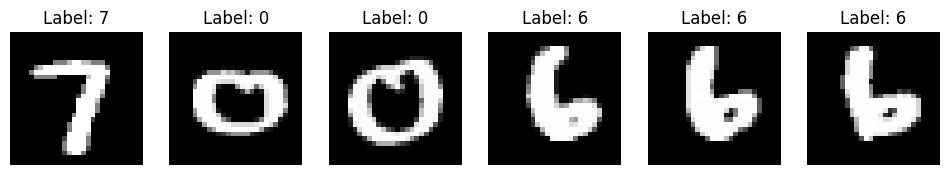

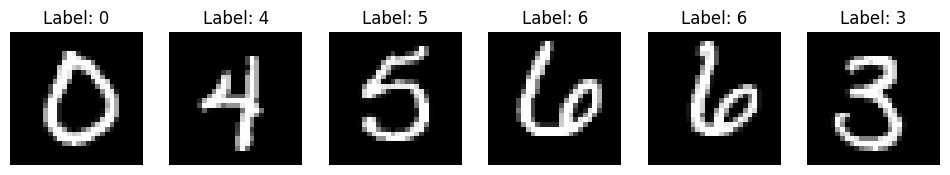

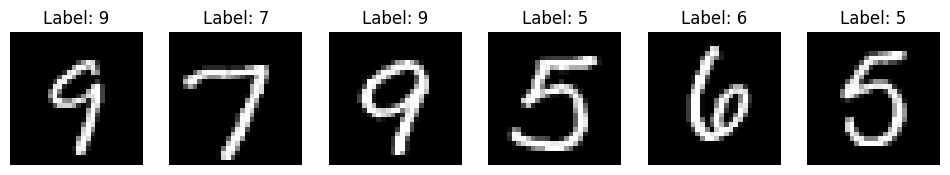

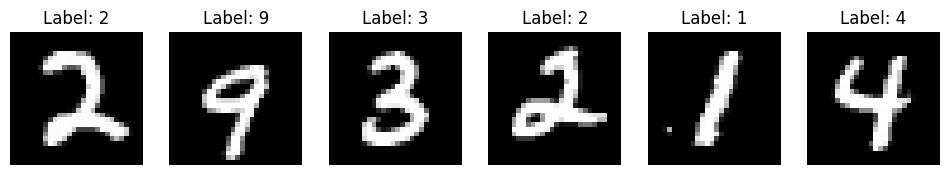

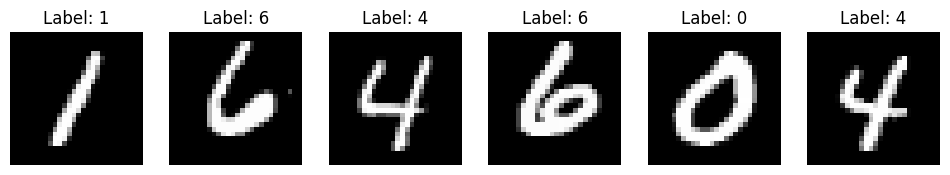

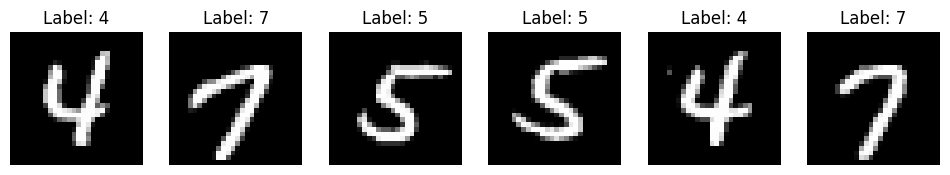

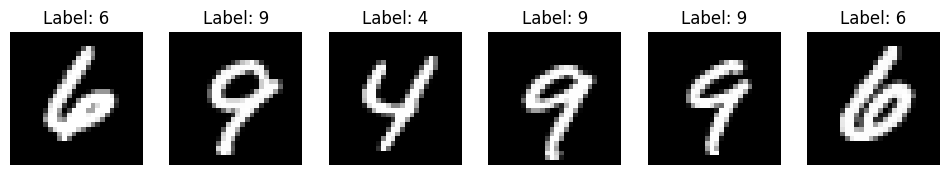

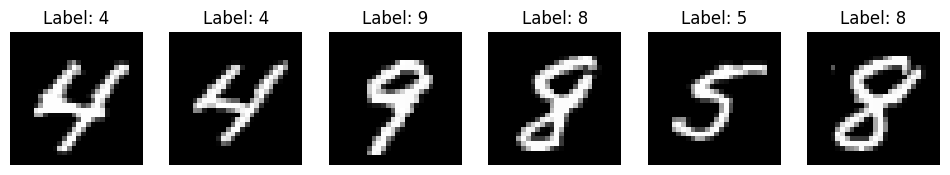

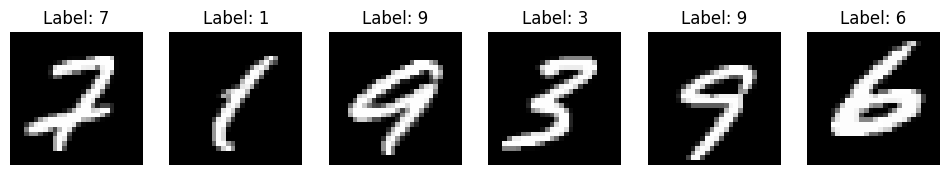

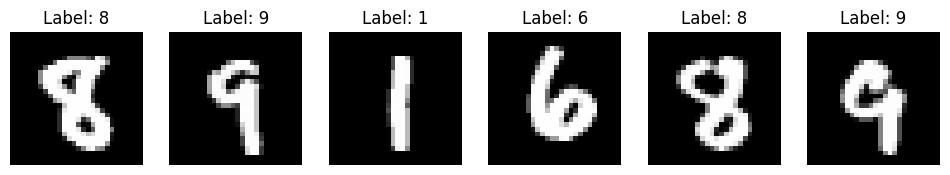

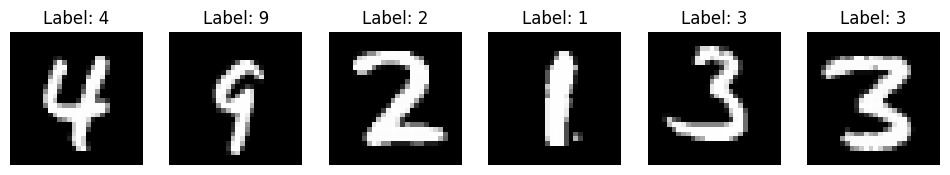

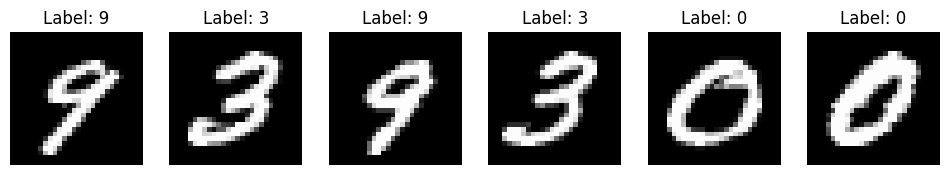

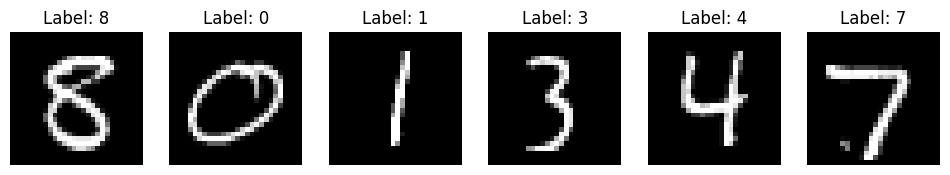

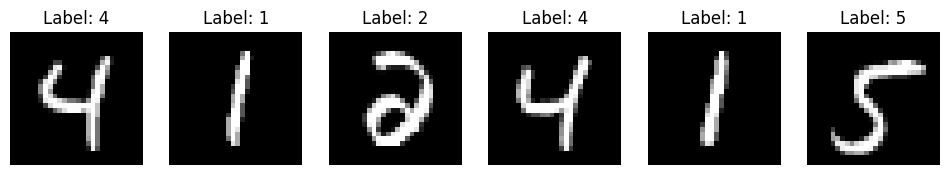

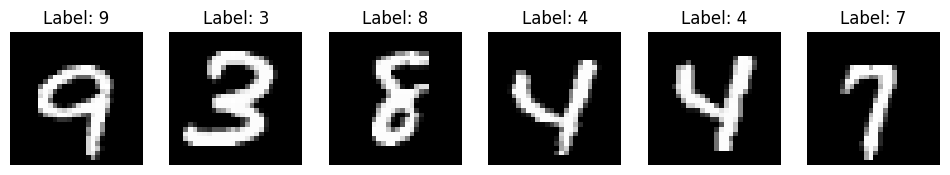

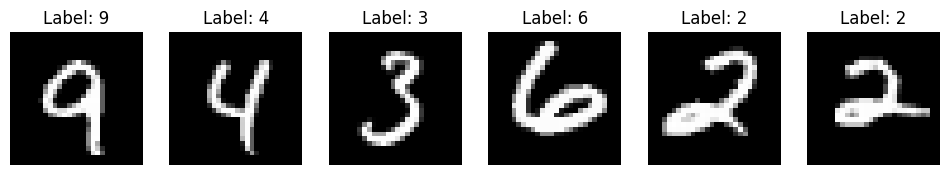

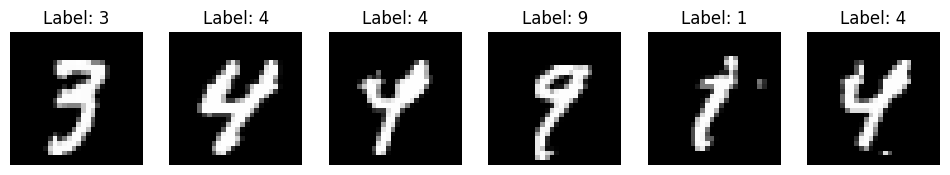

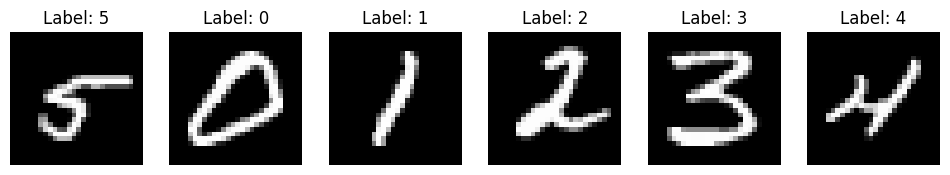

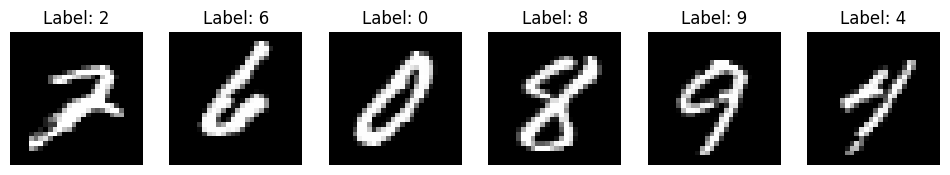

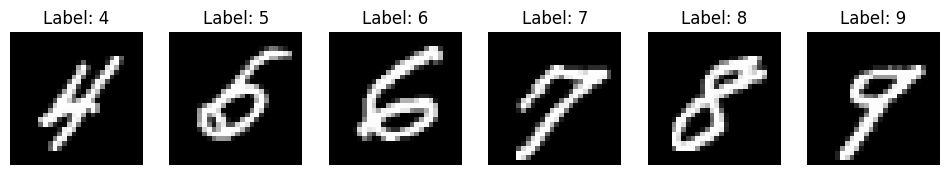

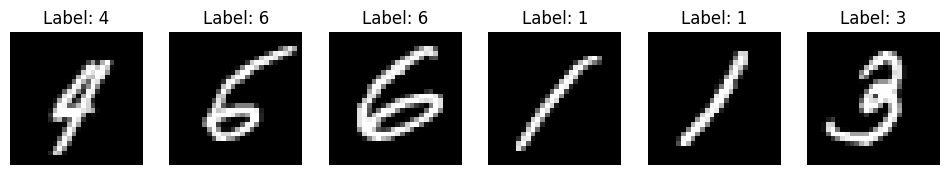

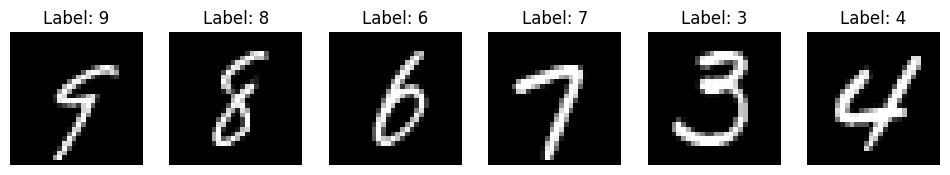

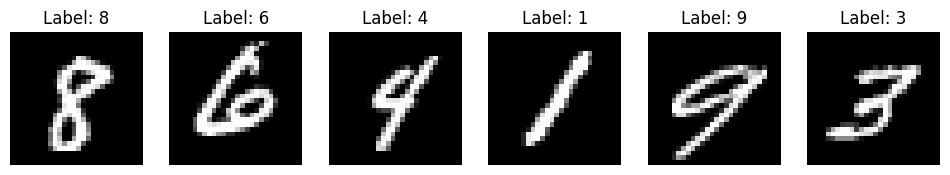

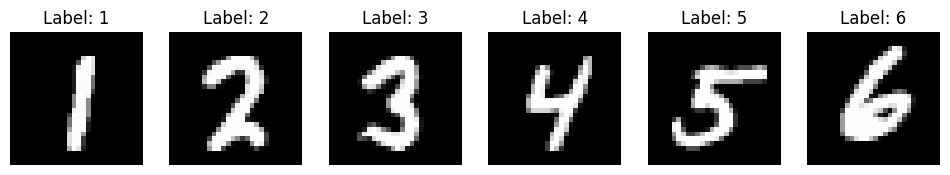

Accuracy of the network on the 10000 test images: 99 %


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # 展示数据中的前6张图片
        images, labels = data
        images = images.numpy()
        
        # 创建一个新的figure，并设置大小
        fig = plt.figure(figsize=(12, 6))  # 设定一个合适的大小，这里设置为12x6英寸
        
        for i in range(min(len(images), 6)):
            img = np.squeeze(images[i])
            
            # 在一行中创建6个子图，每个子图的位置由subplot参数决定
            plt.subplot(1, 6, i + 1)
            
            # 绘制图片
            plt.imshow(img, cmap='gray')
            plt.axis('off')  # 关闭坐标轴
            plt.title('Label: {}'.format(labels[i]))
        
        # plt.show()

        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
